In [64]:
import numpy as np
import networkx as nx
import seaborn
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pickle
from typing import Dict, List, Tuple, Callable

In [2]:
demographics = pickle.load(open('data/demographics.pkl', 'rb'))

comb_counts_feb = pickle.load(open('data/comb_counts_feb.pkl', 'rb'))
comb_counts_apr = pickle.load(open('data/comb_counts_apr.pkl', 'rb'))

trip_counts_feb = pickle.load(open('data/trip_counts_feb.pkl', 'rb'))
trip_counts_apr = pickle.load(open('data/trip_counts_apr.pkl', 'rb'))

g_feb = nx.read_graphml('data/graphs/feb_N_10000.graphml')
# g_feb_small = nx.read_graphml('data/graphs/feb_N_1000.graphml')
g_apr = nx.read_graphml('data/graphs/apr_N_10000.graphml')

google_mobility_agg = pickle.load(open('data/google_mobility_agg.pkl', 'rb'))

# store all CBGs in order
ordered_cbgs = sorted(demographics.keys())

In [33]:
# density
def calc_density(graph: nx.Graph) -> float:
    num_edges = len(graph.edges)
    num_nodes = len(graph.nodes)
    num_edges_max = num_nodes * (num_nodes - 1) / 2
    return num_edges / num_edges_max

In [ ]:
densities = [calc_density(g_feb), calc_density(g_apr)]

In [32]:
# shortest path length

def calc_shortest_paths(graph: nx.Graph) -> List[int]:
    shortest_paths = []
    for x in nx.shortest_path_length(graph):
        shortest_paths.extend(list(x[1].values()))
    return shortest_paths

In [34]:
# takes very long.. only calculate if necessary

# shortest_paths = []
# shortest_paths.append(calc_shortest_paths(g_feb))
# print('feb done')
# shortest_paths.append(calc_shortest_paths(g_apr))
# print('apr done')

# pickle.dump(shortest_paths, open('data/shortest_paths.pkl', 'wb'))

feb done
apr done


In [39]:
shortest_paths = pickle.load(open('data/shortest_paths.pkl', 'rb'))

In [35]:
# cluster coefficient

def calc_cluster_coeff(graph: nx.Graph) -> List[float]:
    coefficients = nx.clustering(graph)
    return list(coefficients.values())

In [41]:
clustering_coeffs = []
clustering_coeffs.append(calc_cluster_coeff(g_feb))
clustering_coeffs.append(calc_cluster_coeff(g_apr))

In [9]:
# Matplotlib settings
matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.dpi'] = 300
seaborn.set_context('notebook', font_scale=1)

def set_boxplot_colors(bp):
    bp['medians'][0].set_color('firebrick')
    bp['medians'][1].set_color('steelblue')
    
    bp['boxes'][0].set_color('firebrick')
    bp['boxes'][1].set_color('steelblue')
    
    bp['caps'][0].set_color('firebrick')
    bp['caps'][1].set_color('firebrick')
    bp['caps'][2].set_color('steelblue')
    bp['caps'][3].set_color('steelblue')
    
    bp['whiskers'][0].set_color('firebrick')
    bp['whiskers'][1].set_color('firebrick')
    bp['whiskers'][2].set_color('steelblue')
    bp['whiskers'][3].set_color('steelblue')

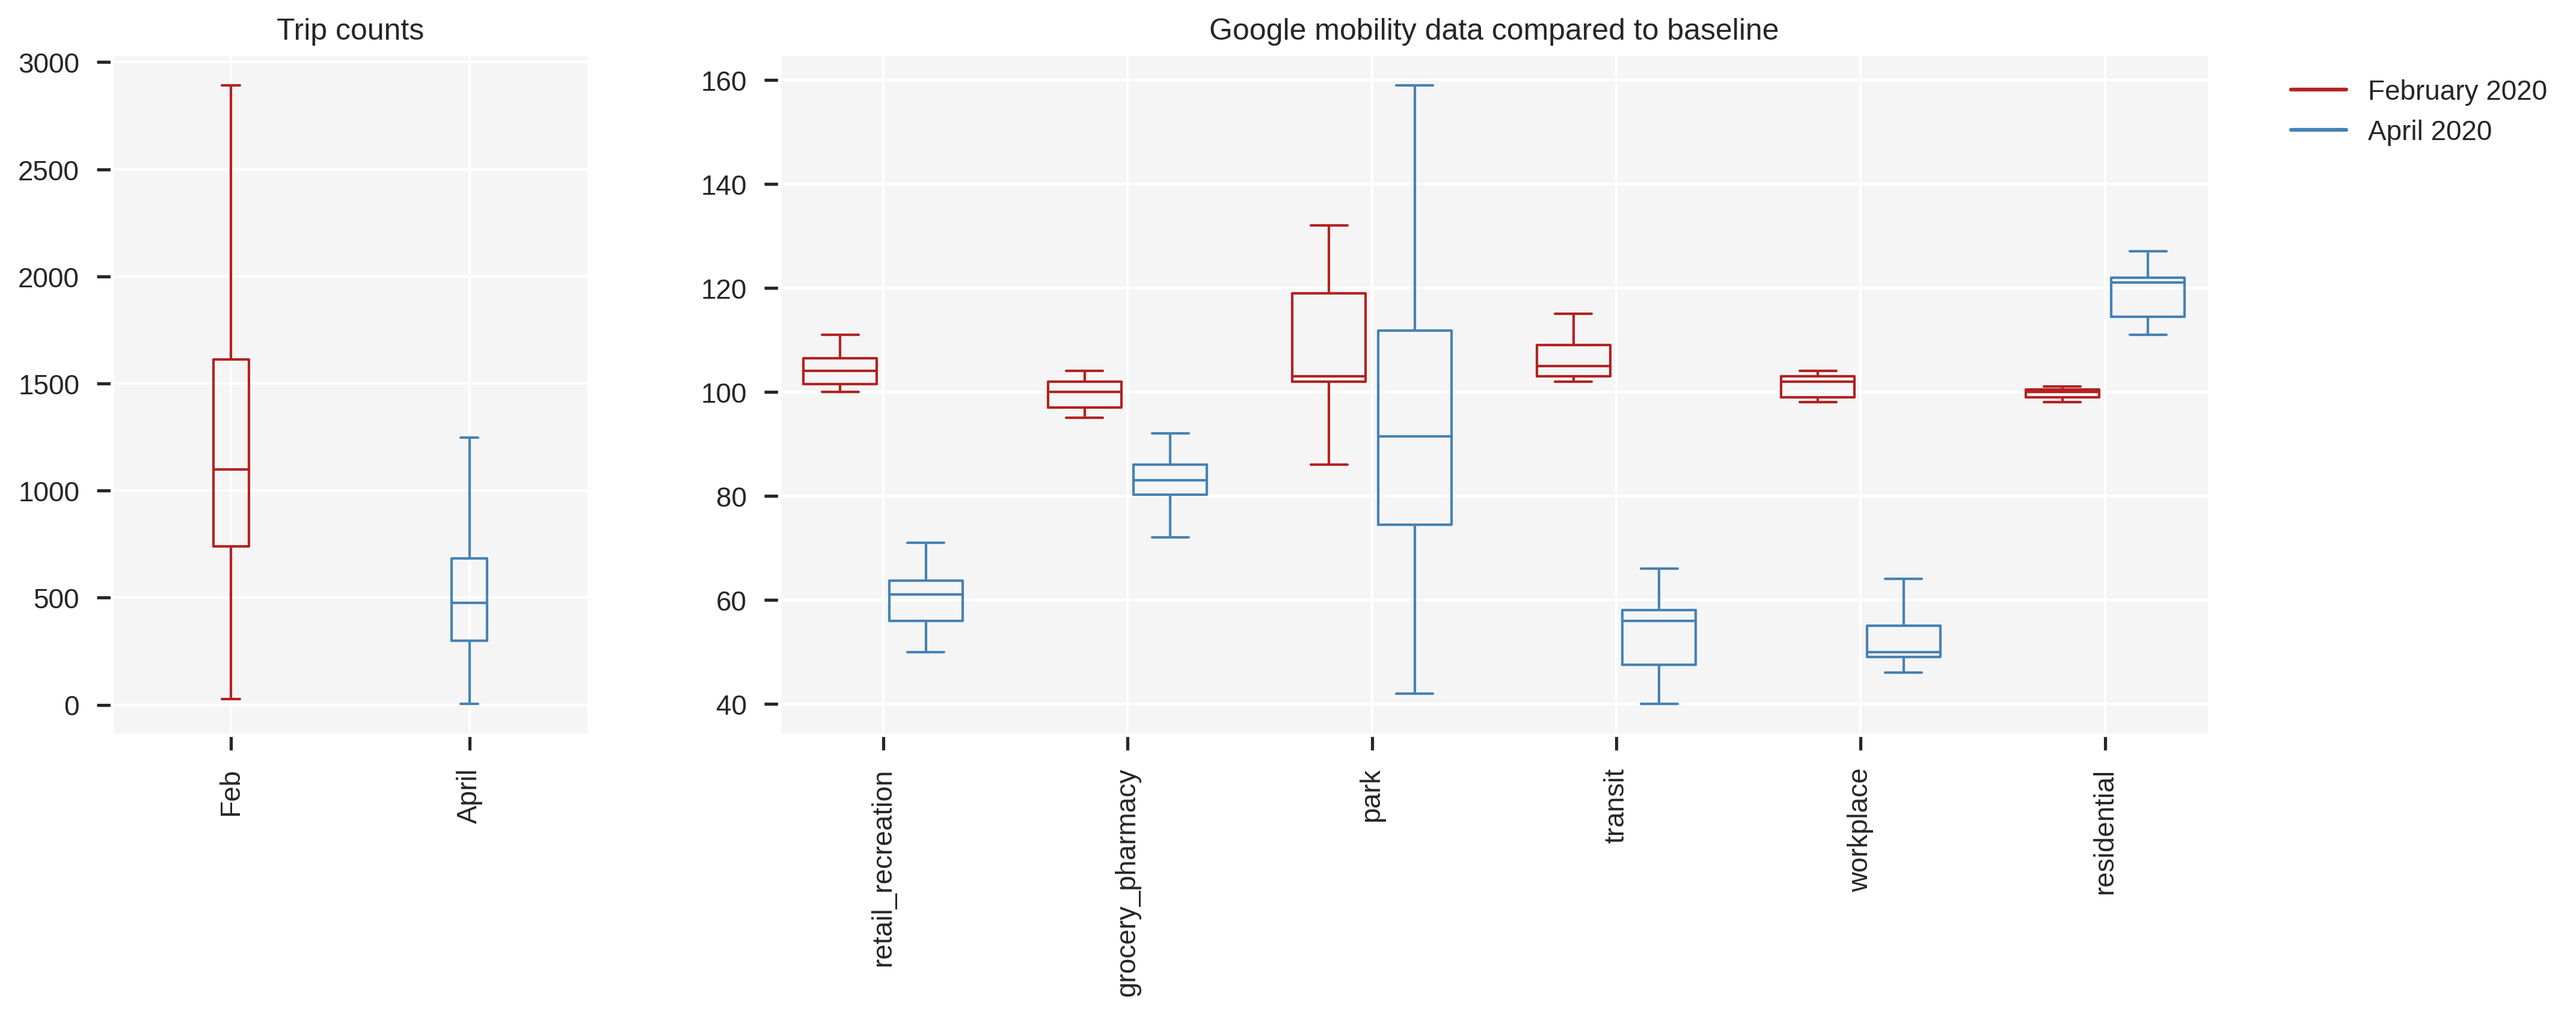

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), facecolor='w', gridspec_kw={'width_ratios': [1, 3]})

# trip counts
data_trips = [list(trip_counts_feb.values()), list(trip_counts_apr.values())]
bp = ax1.boxplot(data_trips, showfliers=False)
set_boxplot_colors(bp)

ax1.set_facecolor('#F5F5F5')
ax1.set_title('Trip counts')
ax1.set_xticks([1, 2])
ax1.set_xticklabels(['Feb', 'April'], rotation=90)

# google
categories = google_mobility_agg[2].keys()

c = 1
for k in categories:
    data = [google_mobility_agg[2][k], google_mobility_agg[4][k]]
    bp = ax2.boxplot(data, positions = [c+0.15, c+0.85], widths=0.6, showfliers=False)
    set_boxplot_colors(bp)
    
    c += 2

ax2.set_title('Google mobility data compared to baseline')
ax2.set_xticks([1.5 + i*2 for i, _ in enumerate(categories)])
ax2.set_xticklabels(list(categories), rotation=90)
ax2.set_facecolor('#F5F5F5')

_ = plt.plot([], color='firebrick', label='February 2020', ls='-')
_ = plt.plot([], color='steelblue', label='April 2020')
_ = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

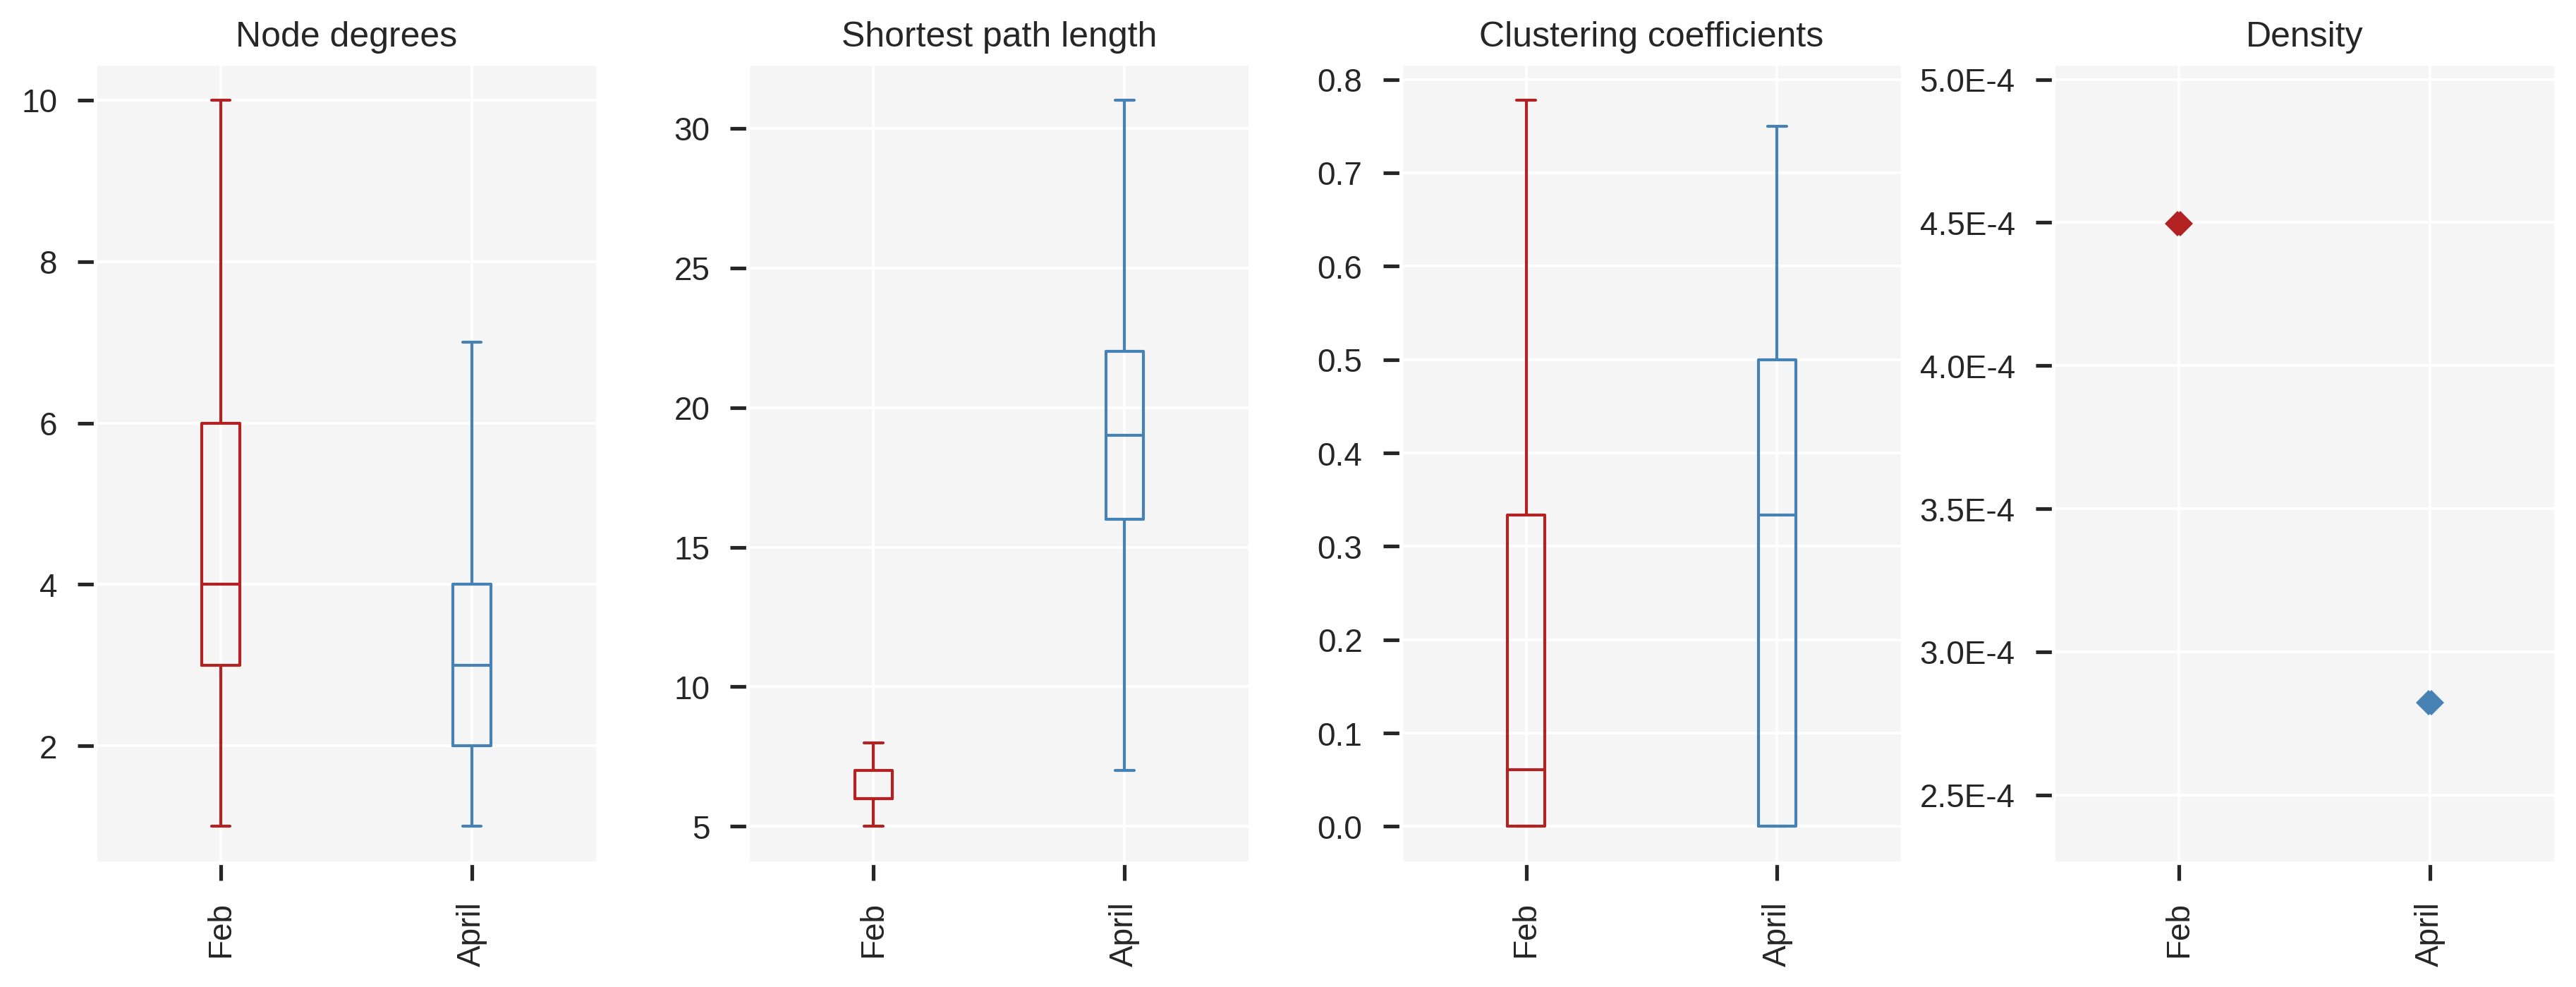

In [104]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,5), facecolor='w', 
                                         gridspec_kw={'width_ratios': [1, 1, 1, 1]})

# degrees
data_degrees = [degrees_feb, degrees_apr]
bp = ax1.boxplot(data_degrees, showfliers=False)
set_boxplot_colors(bp)

ax1.set_facecolor('#F5F5F5')
ax1.set_title('Node degrees')
ax1.set_xticks([1, 2])
ax1.set_xticklabels(['Feb', 'April'], rotation=90)

# shortest path
data_shortest_path = shortest_paths
bp = ax2.boxplot(data_shortest_path, showfliers=False)
set_boxplot_colors(bp)

ax2.set_facecolor('#F5F5F5')
ax2.set_title('Shortest path length')
ax2.set_xticks([1, 2])
ax2.set_xticklabels(['Feb', 'April'], rotation=90)

# clustering coefficient
data_clustering = clustering_coeffs
bp = ax3.boxplot(data_clustering, showfliers=False)
set_boxplot_colors(bp)

ax3.set_facecolor('#F5F5F5')
ax3.set_title('Clustering coefficients')
ax3.set_xticks([1, 2])
ax3.set_xticklabels(['Feb', 'April'], rotation=90)

# density
medianprops = dict(linewidth=4, marker='D')
data_density = [[densities[0]], [densities[1]]]
bp = ax4.boxplot(data_density, showfliers=False, medianprops=medianprops, widths=0.01)
set_boxplot_colors(bp)

margin = abs(densities[0] - densities[1]) / 3
y_low = min(densities[0], densities[1]) - margin
y_up = max(densities[0], densities[1]) + margin

fmt = lambda x, _: '{:.1f}'.format(x*10000) + 'E-4'

ax4.set_ylim(y_low, y_up)
ax4.yaxis.set_major_formatter(fmt)
ax4.set_facecolor('#F5F5F5')
ax4.set_title('Density')
ax4.set_xticks([1, 2])
ax4.set_xticklabels(['Feb', 'April'], rotation=90)

plt.subplots_adjust(wspace=0.3)